In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('Cleaned_Data.csv')
df.head()

,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,0,42,2,119808.30,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,0,39,1,119808.30,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9626 entries, 0 to 9625
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9626 non-null   int64  
 1   Surname          9626 non-null   object 
 2   CreditScore      9626 non-null   int64  
 3   Country          9626 non-null   object 
 4   Gender           9626 non-null   int64  
 5   Age              9626 non-null   int64  
 6   Tenure           9626 non-null   int64  
 7   Balance          9626 non-null   float64
 8   NumOfProducts    9626 non-null   int64  
 9   HasCrCard        9626 non-null   int64  
 10  IsActiveMember   9626 non-null   int64  
 11  EstimatedSalary  9626 non-null   float64
 12  Exited           9626 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 977.8+ KB


In [ ]:
df.drop(columns=['HasCrCard', 'IsActiveMember', 'Gender'], inplace=True)

In [ ]:
df.drop(columns=['Country'], inplace=True)

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,15634602,Hargrave,619,42,2,119808.30,1,101348.88,1
1,15647311,Hill,608,41,1,83807.86,1,112542.58,0
2,15619304,Onio,502,42,8,159660.80,3,113931.57,1
3,15701354,Boni,699,39,1,119808.30,2,93826.63,0
4,15737888,Mitchell,850,43,2,125510.82,1,79084.10,0


In [ ]:
features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
X = df[features]
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
X_train[:5], X_test[:5]

(array([[ 6.31716609e-01,  1.34025665e-01, -6.98910725e-01,
          1.35144983e+00, -9.21486290e-01, -1.71880422e-01],
        [-9.09230402e-01,  1.34025665e-01, -5.62730053e-03,
         -7.41579635e-05,  7.91561618e-01, -1.43150115e+00],
        [-6.17699886e-01, -3.19599663e-01,  6.87656124e-01,
          2.61647039e+00, -9.21486290e-01, -7.65758874e-01],
        [ 1.05860058e+00,  8.14463658e-01, -6.98910725e-01,
         -5.95316887e-01,  7.91561618e-01, -1.81106740e-01],
        [ 6.62952021e-01, -3.19599663e-01, -6.98910725e-01,
         -7.41579635e-05,  7.91561618e-01, -7.97539451e-02]]),
 array([[-7.73876948e-01, -2.13410098e+00,  3.41014412e-01,
         -7.41579635e-05,  7.91561618e-01, -4.83742505e-01],
        [ 5.69245784e-01,  1.83512065e+00, -6.98910725e-01,
          2.51609987e-01,  2.50460953e+00, -7.29930841e-02],
        [-4.61522824e-01,  2.06193331e-02, -6.98910725e-01,
         -8.24153277e-01, -9.21486290e-01, -1.09450041e+00],
        [-1.02376025e+00,  1.3

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[1443   76]
 [ 263  144]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      1519
           1       0.65      0.35      0.46       407

    accuracy                           0.82      1926
   macro avg       0.75      0.65      0.68      1926
weighted avg       0.81      0.82      0.80      1926


Accuracy: 0.82398753894081


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after SMOTE
y_train_balanced.value_counts()

,count
Exited,
0,6158
1,6158


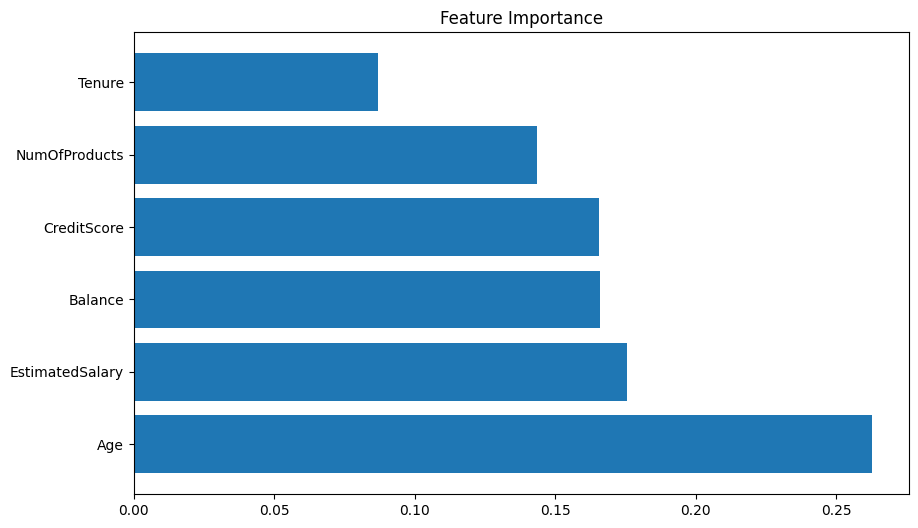

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances) [::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range (X.shape[1]), importances [indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

In [ ]:
#Binary feature for Balance
#df['BalanceZero'] = (df['Balance'] == 0).astype(int)

#Age groups
df['AgeGroup'] = pd.cut(df ['Age'], bins = [18, 25, 35, 45, 55, 65, 75, 85, 95], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])

#Balance to Salary Ratio
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

#Interaction feature between NumOfProducts and IsActiveMember
#df ['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']

#Tenure grouping
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 7, 10], labels=['0-2', '3-5', '6-7', '8-10'])

In [ ]:
label_encoder = LabelEncoder()
df['Male_Germany'] = df['Gender'] * df['Country_Germany']
df['Male_Spain'] = df['Gender'] * df['Country_Spain']

KeyError: 'Gender'

In [ ]:
df = pd.get_dummies(df, columns=['AgeGroup','TenureGroup'], drop_first=True)

In [ ]:
features = ['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts',
       'EstimatedSalary',
        'BalanceToSalaryRatio',] + [col for col in df.columns if 'AgeGroup' in col or 'TenureGroup' in col]

X = df[features]
y= df["Exited"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[1449   70]
 [ 258  149]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1519
           1       0.68      0.37      0.48       407

    accuracy                           0.83      1926
   macro avg       0.76      0.66      0.69      1926
weighted avg       0.81      0.83      0.81      1926


Accuracy: 0.829698857736241


## 🔧 Model Improvement Section

### ✅ 1. Hyperparameter Tuning with RandomizedSearchCV

### ✅ 2. Try Logistic Regression for Comparison

### ✅ 3. Feature Engineering Example: Interaction Feature

In [ ]:

# Create a new feature as interaction between Age and Balance
df['Age_Balance'] = df['Age'] * df['Balance']

# Redefine features and preprocess
features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Age_Balance']
X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Reapply SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [ ]:

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='f1'
)

random_search.fit(X_train_balanced, y_train_balanced)

best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Model Accuracy: 0.8042575285565939
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1519
           1       0.54      0.49      0.52       407

    accuracy                           0.80      1926
   macro avg       0.70      0.69      0.70      1926
weighted avg       0.80      0.80      0.80      1926



In [ ]:

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model.fit(X_train_balanced, y_train_balanced)

log_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))


Logistic Regression Accuracy: 0.7237798546209762
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1519
           1       0.41      0.66      0.50       407

    accuracy                           0.72      1926
   macro avg       0.65      0.70      0.66      1926
weighted avg       0.79      0.72      0.74      1926



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Train XGBoost
xgb_model = xgb.XGBClassifier(scale_pos_weight=2, eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:49:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.784527518172378
XGBoost Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1519
           1       0.49      0.57      0.53       407

    accuracy                           0.78      1926
   macro avg       0.69      0.71      0.69      1926
weighted avg       0.80      0.78      0.79      1926



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Base learners
estimators = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', xgb.XGBClassifier(scale_pos_weight=2, eval_metric='logloss', use_label_encoder=False, random_state=42))
]

# Stacking with logistic regression as final estimator
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack_model.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
stack_pred = stack_model.predict(X_test)
print("Stacked Model Accuracy:", accuracy_score(y_test, stack_pred))
print("Stacked Classification Report:\n", classification_report(y_test, stack_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:49:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacked Model Accuracy: 0.8021806853582555
Stacked Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1519
           1       0.53      0.53      0.53       407

    accuracy                           0.80      1926
   macro avg       0.70      0.70      0.70      1926
weighted avg       0.80      0.80      0.80      1926



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Get predicted probabilities
y_proba = log_model.predict_proba(X_test)[:, 1]

# Try different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for thresh in thresholds:
    y_thresh = (y_proba >= thresh).astype(int)
    print(f"Threshold: {thresh}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_thresh))
    print("Precision:", precision_score(y_test, y_thresh))
    print("Recall:", recall_score(y_test, y_thresh))
    print("F1 Score:", f1_score(y_test, y_thresh))
    print("-" * 40)


Threshold: 0.3
Confusion Matrix:
 [[534 985]
 [ 39 368]]
Precision: 0.2719881744271988
Recall: 0.9041769041769042
F1 Score: 0.41818181818181815
----------------------------------------
Threshold: 0.4
Confusion Matrix:
 [[855 664]
 [ 83 324]]
Precision: 0.32793522267206476
Recall: 0.7960687960687961
F1 Score: 0.4645161290322581
----------------------------------------
Threshold: 0.5
Confusion Matrix:
 [[1126  393]
 [ 139  268]]
Precision: 0.405446293494705
Recall: 0.6584766584766585
F1 Score: 0.50187265917603
----------------------------------------
Threshold: 0.6
Confusion Matrix:
 [[1298  221]
 [ 194  213]]
Precision: 0.49078341013824883
Recall: 0.5233415233415234
F1 Score: 0.5065398335315101
----------------------------------------
Threshold: 0.7
Confusion Matrix:
 [[1397  122]
 [ 257  150]]
Precision: 0.5514705882352942
Recall: 0.36855036855036855
F1 Score: 0.4418262150220913
----------------------------------------
